In [10]:
import csv
data = [] 
cf = open("/Users/apple/Documents/Wisc/study/2019Fall/STAT 628/Module3/PAreview_clean.csv",'r', encoding='utf-8',errors='ignore')

file = csv.DictReader(cf)

for x in file:
    line = {'business_id':x['business_id'],'date':x['date'],'stars':x['stars'],'text':x['text']}
    data.append(line)

cf.close()

In [13]:
len(data)

214443

In [36]:
import stemming

from stemming.porter2 import stem 

'servic'

In [45]:
k=[]
for i in range(len(data)):
    k.append(data[i]['stars'])
k_set=set(k)
k_set

{'1.0', '2.0', '3.0', '4.0', '5.0'}

# Find the word's distribution over diff stars

# service dist

In [141]:
stem('service')

'servic'

In [142]:
'servic' in data[0]['text']

True

In [143]:
service=dict()
for i in range(len(data)):
    if data[i]['stars'] not in service.keys():
        service[data[i]['stars']]=0
        if ('servic' in data[i]['text']) or ('service' in data[i]['text']):
            service[data[i]['stars']]+=1
    else:
        if ('servic' in data[i]['text']) or ('service' in data[i]['text']):
            service[data[i]['stars']]+=1
           
    

In [144]:
service

{'4.0': 16766, '5.0': 20687, '1.0': 7288, '3.0': 9720, '2.0': 6832}

In [145]:
import matplotlib.pyplot as plt
import numpy as np

In [146]:
l=sorted(list(service.keys()))
l

['1.0', '2.0', '3.0', '4.0', '5.0']

In [147]:
value=[]
for i in l:
    value.append(service[i])
value

[7288, 6832, 9720, 16766, 20687]

<BarContainer object of 5 artists>

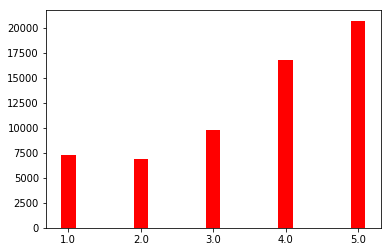

In [148]:
plt.bar(l,value, color='r', width=0.2)

# put all words(positive) we care in a dict

In [149]:
words=['service', 'environment', 'atmosphere', 'flavor', 'attitude', 'price']

In [150]:
words_stem=[]
for word in words:
    words_stem.append(stem(word))
words_stem

['servic', 'environ', 'atmospher', 'flavor', 'attitud', 'price']

In [151]:
all_words=dict()
for word in words_stem:
    all_words[word]=dict()
    for i in range(len(data)):
        if data[i]['stars'] not in all_words[word].keys():
            all_words[word][data[i]['stars']]=0
        if (word in data[i]['text']) :
            all_words[word][data[i]['stars']]+=1
    else:
        if (word in data[i]['text']):
            all_words[word][data[i]['stars']]+=1
           
    

In [152]:
all_words

{'servic': {'4.0': 16766, '5.0': 20687, '1.0': 7288, '3.0': 9720, '2.0': 6832},
 'environ': {'4.0': 725, '5.0': 950, '1.0': 103, '3.0': 355, '2.0': 161},
 'atmospher': {'4.0': 6299, '5.0': 8394, '1.0': 588, '3.0': 3070, '2.0': 1390},
 'flavor': {'4.0': 8849, '5.0': 9763, '1.0': 1529, '3.0': 4619, '2.0': 2957},
 'attitud': {'4.0': 229, '5.0': 207, '1.0': 842, '3.0': 281, '2.0': 428},
 'price': {'4.0': 11915, '5.0': 11302, '1.0': 2190, '3.0': 6673, '2.0': 3611}}

In [153]:
n=len(all_words)
n

6

In [154]:
list(all_words.keys())

['servic', 'environ', 'atmospher', 'flavor', 'attitud', 'price']

In [155]:
name=list(all_words.keys())
name[1]


'environ'

In [156]:
for i in range(n):
    print(331+i)

331
332
333
334
335
336


Text(0.5,1,'servic')

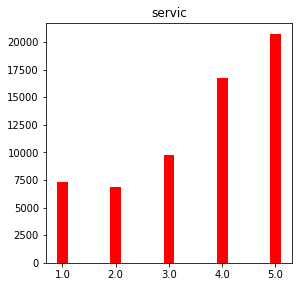

In [157]:
plt.figure(figsize=(15,15))
plt.subplot(331)
name=list(all_words.keys())
l=sorted(list(all_words[name[0]].keys()))
value=[]
for i in l:
    value.append(all_words[name[0]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[0])


Text(0.5,1,'price')

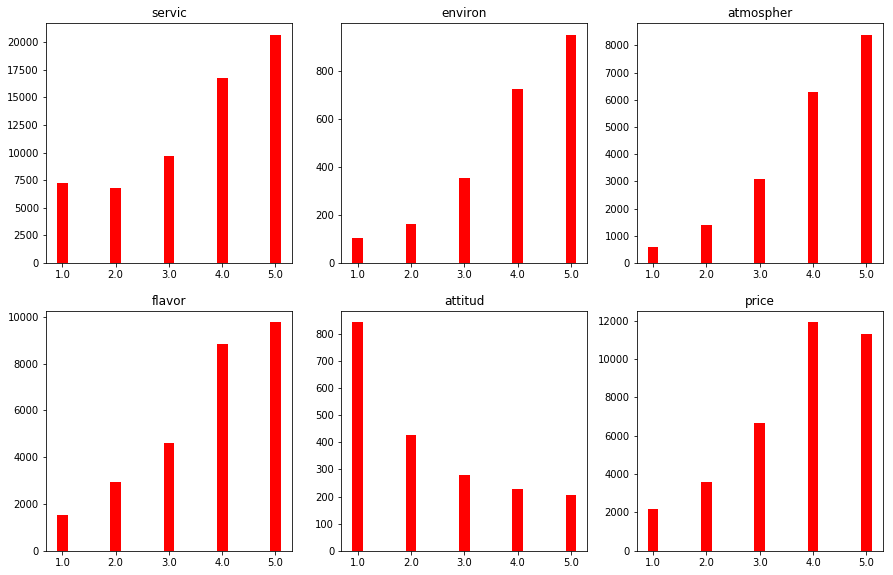

In [158]:
plt.figure(figsize=(15,15))
plt.subplot(331)
name=list(all_words.keys())
l=sorted(list(all_words[name[0]].keys()))
value=[]
for i in l:
    value.append(all_words[name[0]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[0])

plt.subplot(332)
name=list(all_words.keys())
l=sorted(list(all_words[name[1]].keys()))
value=[]
for i in l:
    value.append(all_words[name[1]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[1])

plt.subplot(333)
name=list(all_words.keys())
l=sorted(list(all_words[name[2]].keys()))
value=[]
for i in l:
    value.append(all_words[name[2]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[2])

plt.subplot(334)
name=list(all_words.keys())
l=sorted(list(all_words[name[3]].keys()))
value=[]
for i in l:
    value.append(all_words[name[3]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[3])

plt.subplot(335)
name=list(all_words.keys())
l=sorted(list(all_words[name[4]].keys()))
value=[]
for i in l:
    value.append(all_words[name[4]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[4])

plt.subplot(336)
name=list(all_words.keys())
l=sorted(list(all_words[name[5]].keys()))
value=[]
for i in l:
    value.append(all_words[name[5]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[5])



    

#  put all words(negative) we care in a dict

In [159]:
words=['NOTservice', 'NOTenvironment', 'NOTatmosphere', 'NOTflavor', 'NOTattitude', 'NOTprice']

In [160]:
words_stem=[]
for word in words:
    words_stem.append(stem(word))
words_stem

['NOTservic',
 'NOTenviron',
 'NOTatmospher',
 'NOTflavor',
 'NOTattitud',
 'NOTprice']

In [161]:
all_words=dict()
for word in words_stem:
    all_words[word]=dict()
    for i in range(len(data)):
        if data[i]['stars'] not in all_words[word].keys():
            all_words[word][data[i]['stars']]=0
        if (word in data[i]['text']) :
            all_words[word][data[i]['stars']]+=1
    else:
        if (word in data[i]['text']):
            all_words[word][data[i]['stars']]+=1

In [162]:
all_words

{'NOTservic': {'4.0': 656, '5.0': 581, '1.0': 686, '3.0': 529, '2.0': 577},
 'NOTenviron': {'4.0': 33, '5.0': 23, '1.0': 19, '3.0': 27, '2.0': 16},
 'NOTatmospher': {'4.0': 183, '5.0': 153, '1.0': 30, '3.0': 133, '2.0': 72},
 'NOTflavor': {'4.0': 822, '5.0': 622, '1.0': 192, '3.0': 812, '2.0': 536},
 'NOTattitud': {'4.0': 27, '5.0': 19, '1.0': 103, '3.0': 20, '2.0': 48},
 'NOTprice': {'4.0': 760, '5.0': 524, '1.0': 338, '3.0': 761, '2.0': 642}}

In [163]:
name=list(all_words.keys())
name

['NOTservic',
 'NOTenviron',
 'NOTatmospher',
 'NOTflavor',
 'NOTattitud',
 'NOTprice']

Text(0.5,1,'NOTprice')

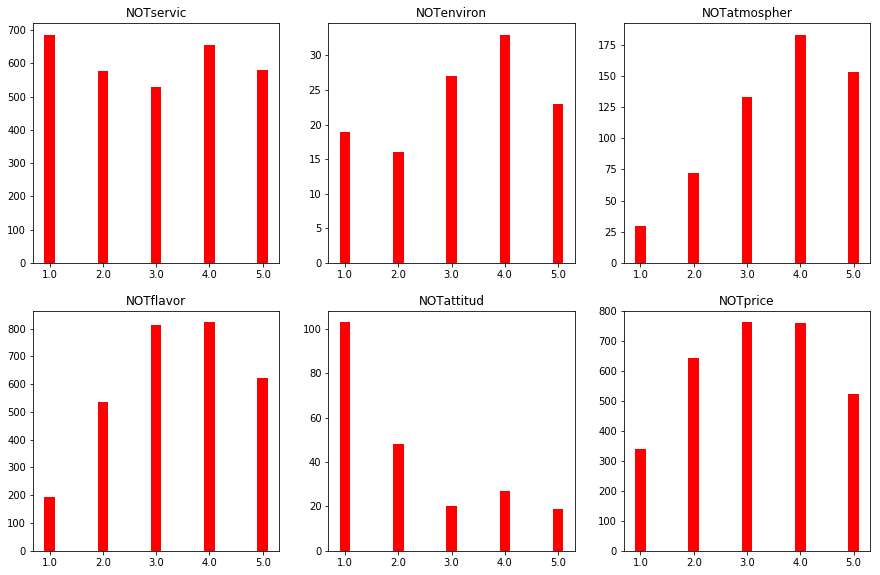

In [164]:
plt.figure(figsize=(15,15))
plt.subplot(331)
name=list(all_words.keys())
l=sorted(list(all_words[name[0]].keys()))
value=[]
for i in l:
    value.append(all_words[name[0]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[0])

plt.subplot(332)
name=list(all_words.keys())
l=sorted(list(all_words[name[1]].keys()))
value=[]
for i in l:
    value.append(all_words[name[1]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[1])

plt.subplot(333)
name=list(all_words.keys())
l=sorted(list(all_words[name[2]].keys()))
value=[]
for i in l:
    value.append(all_words[name[2]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[2])

plt.subplot(334)
name=list(all_words.keys())
l=sorted(list(all_words[name[3]].keys()))
value=[]
for i in l:
    value.append(all_words[name[3]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[3])

plt.subplot(335)
name=list(all_words.keys())
l=sorted(list(all_words[name[4]].keys()))
value=[]
for i in l:
    value.append(all_words[name[4]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[4])

plt.subplot(336)
name=list(all_words.keys())
l=sorted(list(all_words[name[5]].keys()))
value=[]
for i in l:
    value.append(all_words[name[5]][i])
plt.bar(l,value, color='r', width=0.2) 
plt.title(name[5])



    